# I. Import Module, configs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.float_format', lambda x: '%.2f' % x) #round float
plt.rcParams['figure.figsize'] = (8.5, 5)
plt.rcParams["patch.force_edgecolor"] = True
sns.mpl.rc("figure", figsize=(8.5,5))
pd.set_option('max_colwidth', 400)

# II. Import Data

We start by acquiring the training and testing datasets into Pandas DataFrames.

In [ ]:
train_df = pd.read_csv('/work/row/attrition_train.csv', low_memory=False)

In [ ]:
test_df = pd.read_csv('/work/row/attrition_test.csv', low_memory=False)

We can see that most of our data are numerical values


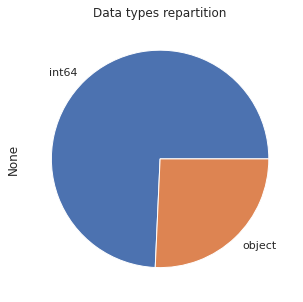

In [ ]:
# Just as informations about our data types
sns.set_theme(style="whitegrid")
plt.title('Data types repartition')
train_df.dtypes.value_counts().plot.pie()
print('We can see that most of our data are numerical values')

# III. Analyze by describing the data

**Which features are available in the dataset ?**

In [ ]:
print(train_df.columns.values)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


**Which  features are categorical ?**

In [ ]:
category_cols = train_df.select_dtypes(include="object").columns
print(category_cols.tolist())

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


These values classify the sample into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical : Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MartialStatus, Over18, OverTime

**Which features are numerical ?**

In [ ]:
numerical_cols = train_df.select_dtypes(include="int64").columns
print(numerical_cols.tolist())

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based ? Among other things this help us select the appropriate plots for visualisation.

* Numerical: Age, DailyRate, DistanceFromHome, Education, EpmployeeCount, EmployeeNumber, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, Jobsatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel,TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

**How does the data looks like?**

In [ ]:
# Show the first 5 rows of the dataframe
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,No,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,...,4,80,0,17,2,3,15,7,4,12
1,52,No,Travel_Frequently,322,Research & Development,28,2,Medical,1,1401,...,2,80,1,24,3,2,5,3,0,2
2,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,...,1,80,3,10,6,3,9,8,7,5
3,43,No,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,...,2,80,1,25,2,3,8,7,0,7
4,27,No,Non-Travel,443,Research & Development,3,3,Medical,1,850,...,3,80,3,0,6,2,0,0,0,0


In [ ]:
#Show the 5 last rows on the dataframe
train_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1095,48,No,Travel_Rarely,715,Research & Development,1,3,Life Sciences,1,1263,...,3,80,0,25,3,4,1,0,0,0
1096,45,No,Travel_Rarely,176,Human Resources,4,3,Life Sciences,1,1744,...,3,80,2,9,2,4,5,0,0,3
1097,33,No,Travel_Rarely,516,Research & Development,8,5,Life Sciences,1,1515,...,1,80,0,14,6,3,0,0,0,0
1098,29,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,208,...,1,80,1,10,1,3,10,7,0,9
1099,58,Yes,Travel_Rarely,601,Research & Development,7,4,Medical,1,1360,...,4,80,0,31,0,2,10,9,5,9


**Which features contain blank, null or empty values?**

In [ ]:
# Sum of null values for each feature
train_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that none of our feature have missing values. We won't have to think about a filling strategy at this point.

**What are the data types for various features ?**

In [ ]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1100 non-null   int64 
 1   Attrition                 1100 non-null   object
 2   BusinessTravel            1100 non-null   object
 3   DailyRate                 1100 non-null   int64 
 4   Department                1100 non-null   object
 5   DistanceFromHome          1100 non-null   int64 
 6   Education                 1100 non-null   int64 
 7   EducationField            1100 non-null   object
 8   EmployeeCount             1100 non-null   int64 
 9   EmployeeNumber            1100 non-null   int64 
 10  EnvironmentSatisfaction   1100 non-null   int64 
 11  Gender                    1100 non-null   object
 12  HourlyRate                1100 non-null   int64 
 13  JobInvolvement            1100 non-null   int64 
 14  JobLevel                

**What is the distribution of numerical feature values across the samples ?**

The helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 1100 persons represented in this training dataset and 370 (~34% of the actual training set).
* EmployeeCount feature has the same value for each of the observations.
* StandandHours feature has the same value for each of the observations.
* Employees are recognizable by their EmployeeNumber
* The mean Age for our sample (train_df) is 37 y/o
* Most of the employee live close to the working place (< 30 kms)

In [ ]:
train_df.describe()

**What is the distribution of categorical features ?**

* For our categorical features, at max they have 9 different values
* Most of the employees rarely travel for business
* Most of the employee work in the Research & development field
* Attrition is a categorical feature with 'Yes' and 'No' values
* 661 employees are men and 439 are women (60% male and 40% female) 
* Over18 feature only contains one value
* Most of the Attrition values are 'No' (922)

In [ ]:
for col in category_cols:
    print("Unique values of the columns {} : {}".format(col, train_df[col].unique()))
    print("Unique values of the columns {} : {}".format(col, train_df[col].nunique(dropna=True)))

Unique values of the columns Attrition : ['No' 'Yes']
Unique values of the columns Attrition : 2
Unique values of the columns BusinessTravel : ['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
Unique values of the columns BusinessTravel : 3
Unique values of the columns Department : ['Research & Development' 'Sales' 'Human Resources']
Unique values of the columns Department : 3
Unique values of the columns EducationField : ['Life Sciences' 'Medical' 'Human Resources' 'Other' 'Marketing'
 'Technical Degree']
Unique values of the columns EducationField : 6
Unique values of the columns Gender : ['Female' 'Male']
Unique values of the columns Gender : 2
Unique values of the columns JobRole : ['Manufacturing Director' 'Laboratory Technician' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Healthcare Representative'
 'Manager' 'Sales Representative' 'Human Resources']
Unique values of the columns JobRole : 9
Unique values of the columns MaritalStatus : ['Single' 'Married' 'Divorc

In [ ]:
train_df.describe(include=['O'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1100,1100,1100,1100,1100,1100,1100,1100,1100
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,922,775,710,458,661,244,498,1100,783


# IV. Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appopriate actions.

**Correlating.**

We want to know how well does each feature corralate with Attrition. We want to do this early in our project and match these quick correlations with modelled correlations later in this brief.

**Completing.**

Since our dataset has no missing values we don't have to proceed to a filling to complete our features.

**Correcting.**

* We should drop Over18 and EmployeeCount as they have only one variation and therefore will be totally insignificant for the machine learning model.
* We could replace 'Yes' and 'No' values in the Attrition feature(which is actually our target variable) with 0 and 1.
* We should also remove Index1 in the testing set as it useless here and will cause problems when making predictions since that feature is not in the train dataset.

**Creating.**
...

**Classifying.**

We may also add to our assummtions based on the problem description noted earlier.

1. Men(gender=Male) were more likely to leave than women
2. Employee that live close to their working place are more likely to stay than others that leave farther.



In [ ]:
train_df[['Attrition', 'Age']].groupby(train_df['Gender'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Age
0,37.18
1,36.64


In [ ]:
train_df.groupby('Gender')['Attrition'].value_counts().sort_values()

Gender  Attrition
Female  Yes           66
Male    Yes          112
Female  No           373
Male    No           549
Name: Attrition, dtype: int64

In [ ]:
train_df.groupby('DistanceFromHome')['Attrition'].value_counts().sort_values()

DistanceFromHome  Attrition
28                Yes            1
27                Yes            1
26                Yes            2
21                Yes            2
14                Yes            2
11                Yes            2
19                Yes            3
18                Yes            3
22                Yes            3
23                Yes            3
29                Yes            4
17                Yes            4
15                Yes            4
20                Yes            4
16                Yes            5
6                 Yes            5
12                Yes            5
22                No             5
27                No             6
25                Yes            6
13                Yes            6
10                Yes            7
8                 Yes            7
4                 Yes            7
5                 Yes            7
7                 Yes            8
21                No             9
3                 Yes      

# V.Analyse by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.


## Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Attrition). A histogram chart is useful for analyzing continuous numerical 
variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands.

This helps us answer questions relating to specific bands (Does age actually matter when it come to attrition, do elders tend to leave more or less, etc...).

Note that y-axis in historgram visualizations represents the count of samples or employees.

**Observations.**

* Employees (Age ~ 30 y/o) have higher chance to leave the company
* Older employees (Age > 50) can leave as well
* A large amount of employee between 25 and 45 years old didn't leave the company
* Most employees are in 25-45 age range
* Employees tend to stay if they live closer to the working place
* Employees tend to stay if they get a bigger pay
* Employees tend to leave more if their total working year is < than 10 years
* Employees tend to leave more when they worked for less than 2 different companies

This simple analysis confirms our assumptions that:
* We should consider Age in our model training
* We could band age groups

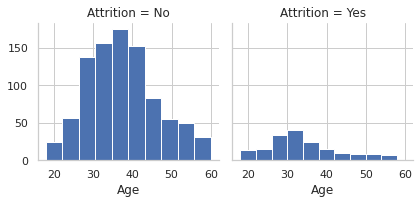

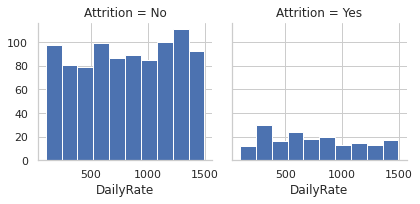

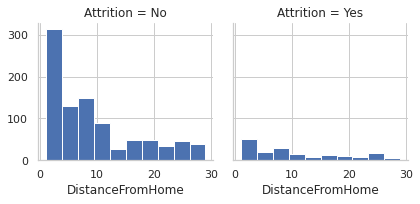

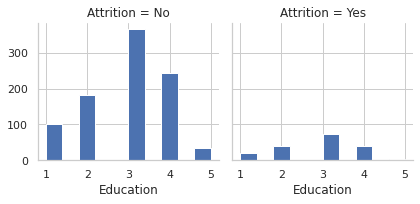

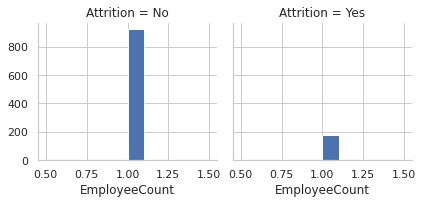

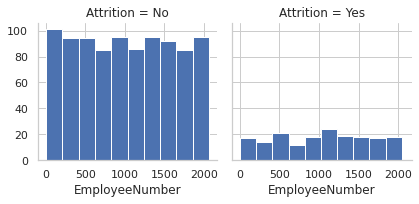

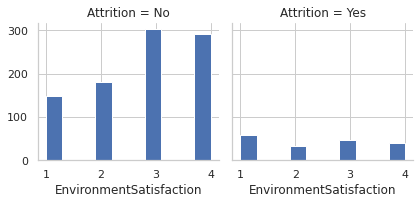

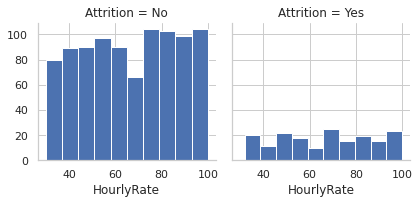

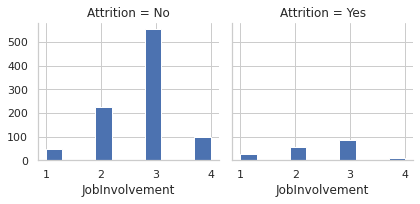

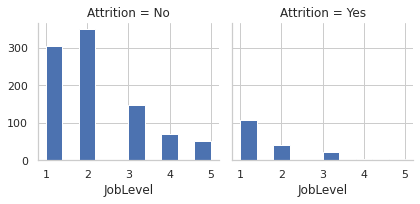

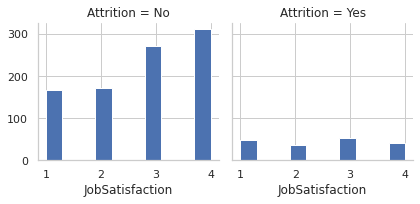

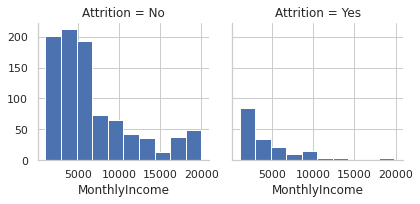

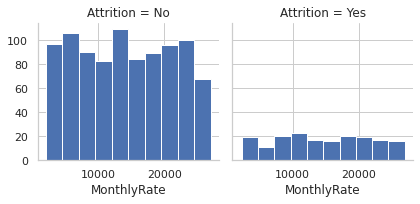

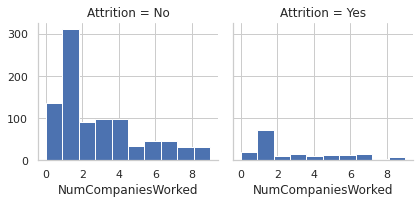

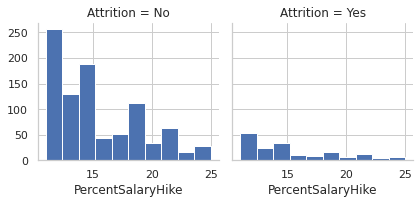

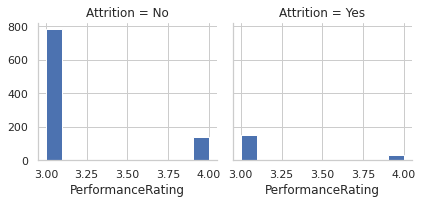

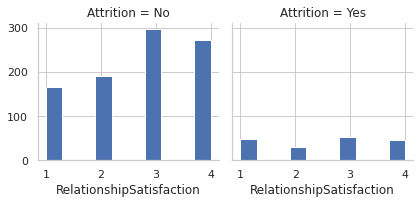

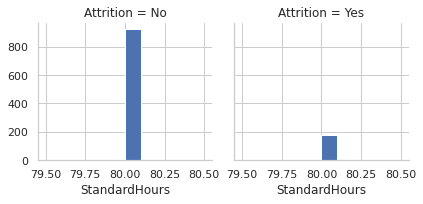

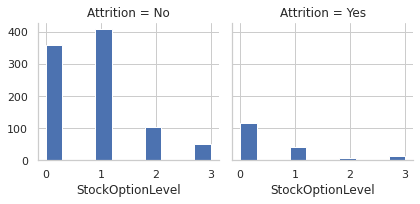

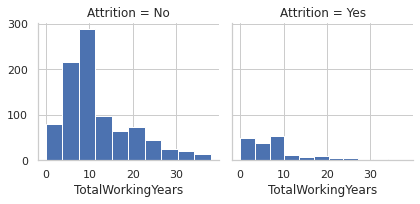

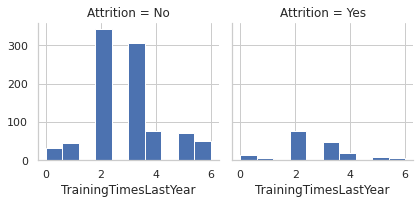

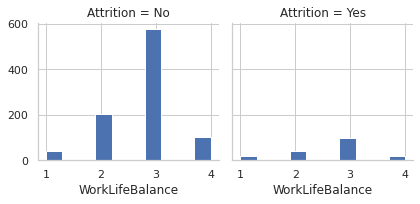

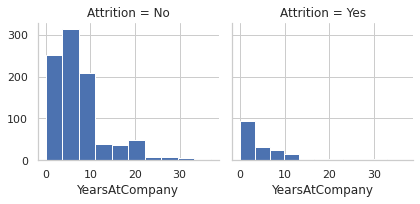

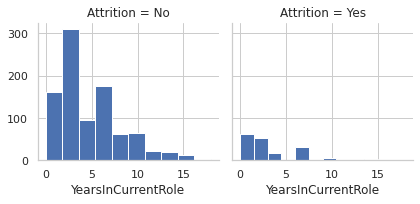

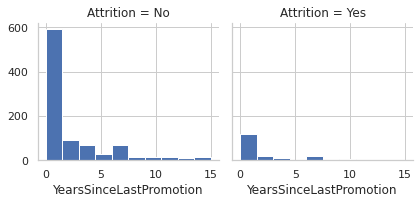

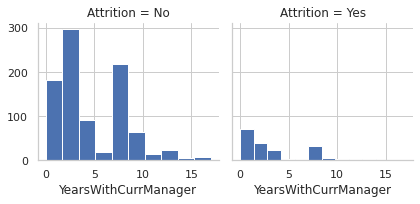

In [ ]:
for col in train_df[numerical_cols]:
    g = sns.FacetGrid(train_df, col='Attrition')
    g.map(plt.hist, col, bins=10)

## Correlating categorical features

Now we can correlate categorical features with our solution goal

**Observations.**

* Male employee have a slight increase chance to leave than women
* The fact that an employee rarely travel has a higher impact in their decision to leave or stay in the company.
* Single employees have more chance to leave than if they were married or divorced

This simple analysis confirms our assumptions that:

* We should take the gender feature to train our model as well as the businessTravel.
* Drop the features that only have one unique value


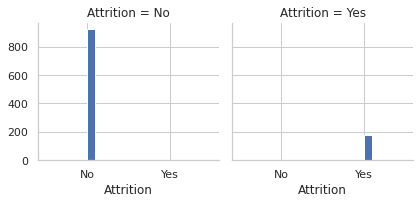

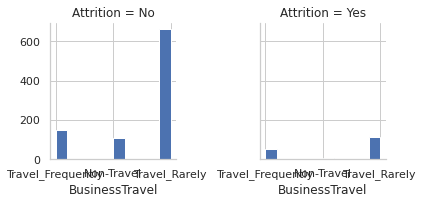

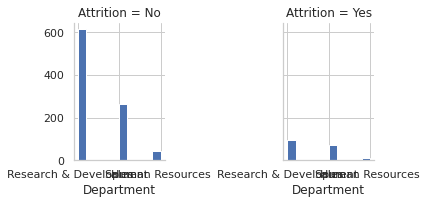

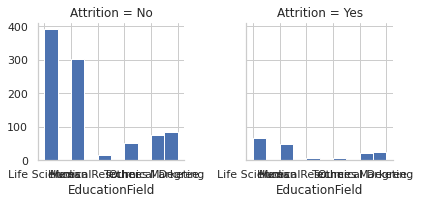

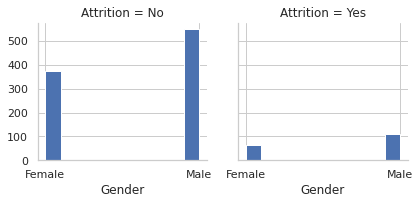

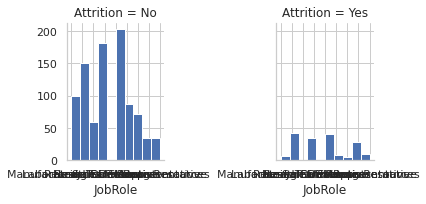

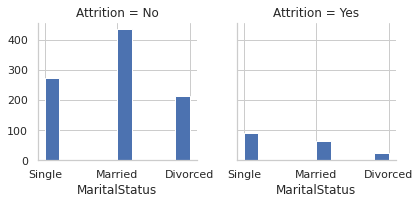

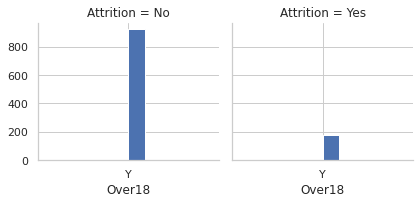

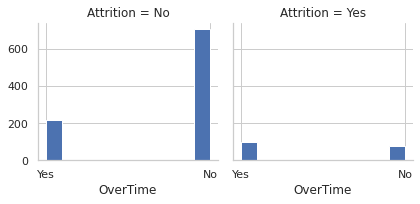

In [ ]:
for col in train_df[category_cols]:
    g = sns.FacetGrid(train_df, col='Attrition')
    g.map(plt.hist, col, bins=10)

# VI. Wrangle data 

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting.

## Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the EmployeeCount, StandardHours and Over18 features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [ ]:
print("Before", train_df.shape, test_df.shape)

Before (1100, 35) (370, 35)


In [ ]:
def get_corr_pairs(df, size):
    """
        return more correlated pairs
    """
    s = df.corr().abs().unstack().sort_values(ascending=False)
    s = s[s.values < 1]
    for i in range(size*2):
        if i % 2 == 0:
            print("{:.5f} {}".format(s[i], s.index[i]))

get_corr_pairs(train_df, 10)

0.95098 ('MonthlyIncome', 'JobLevel')
0.78240 ('JobLevel', 'TotalWorkingYears')
0.77648 ('YearsWithCurrManager', 'YearsAtCompany')
0.77513 ('PercentSalaryHike', 'PerformanceRating')
0.76826 ('MonthlyIncome', 'TotalWorkingYears')
0.76797 ('YearsInCurrentRole', 'YearsAtCompany')
0.72998 ('YearsWithCurrManager', 'YearsInCurrentRole')
0.67252 ('TotalWorkingYears', 'Age')
0.64597 ('YearsAtCompany', 'TotalWorkingYears')
0.58804 ('YearsSinceLastPromotion', 'YearsAtCompany')


We have highly correlated variables, up to 95% correlation. The best to do here is to remove the variables that are correlated with more than one variable as it could decrease the accuracy of our model.

In [ ]:
train_df = train_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'JobLevel', 'YearsWithCurrManager', 'YearsInCurrentRole'], axis=1)
test_df = test_df.drop(['index1', 'EmployeeCount', 'StandardHours', 'Over18', 'JobLevel', 'YearsWithCurrManager', 'YearsInCurrentRole'], axis=1)
print("After", train_df.shape, test_df.shape)

After (1100, 29) (370, 28)


## Correcting by eliminating outliers

For our model to be the most accurate as possible, one important and necessary step is to check if we have inconsistant values for each of our numerical features.

**Observations.**

It seems that we don't have any outstanding values for each of our features. There are some unusal observations but they are far from being impossible values.

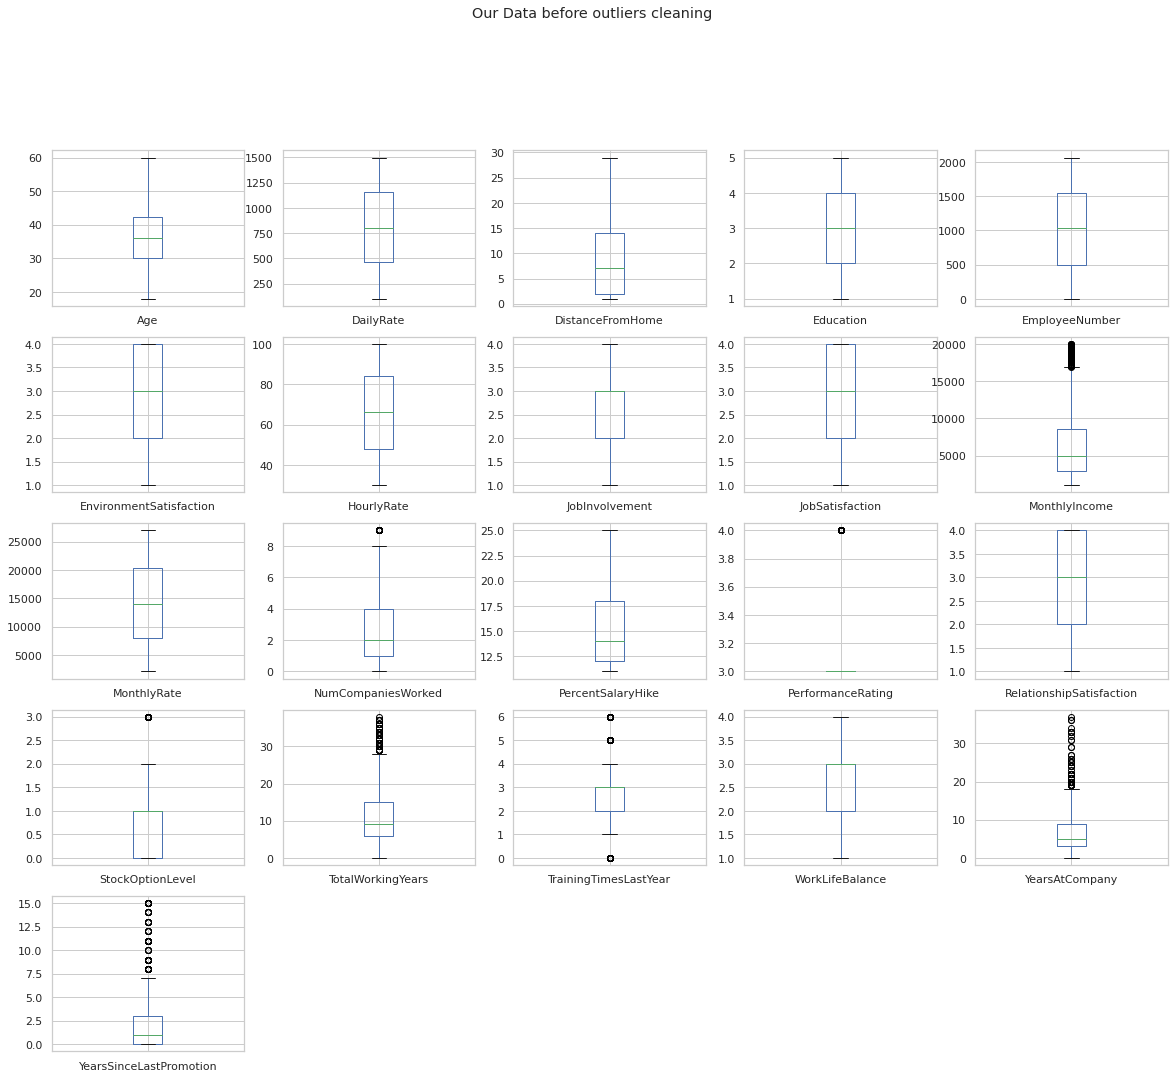

In [ ]:
train_df.select_dtypes(include="int64").plot(kind='box', subplots=True, title='Our Data before outliers cleaning', figsize=(20,20), layout=(6,5))
plt.show()

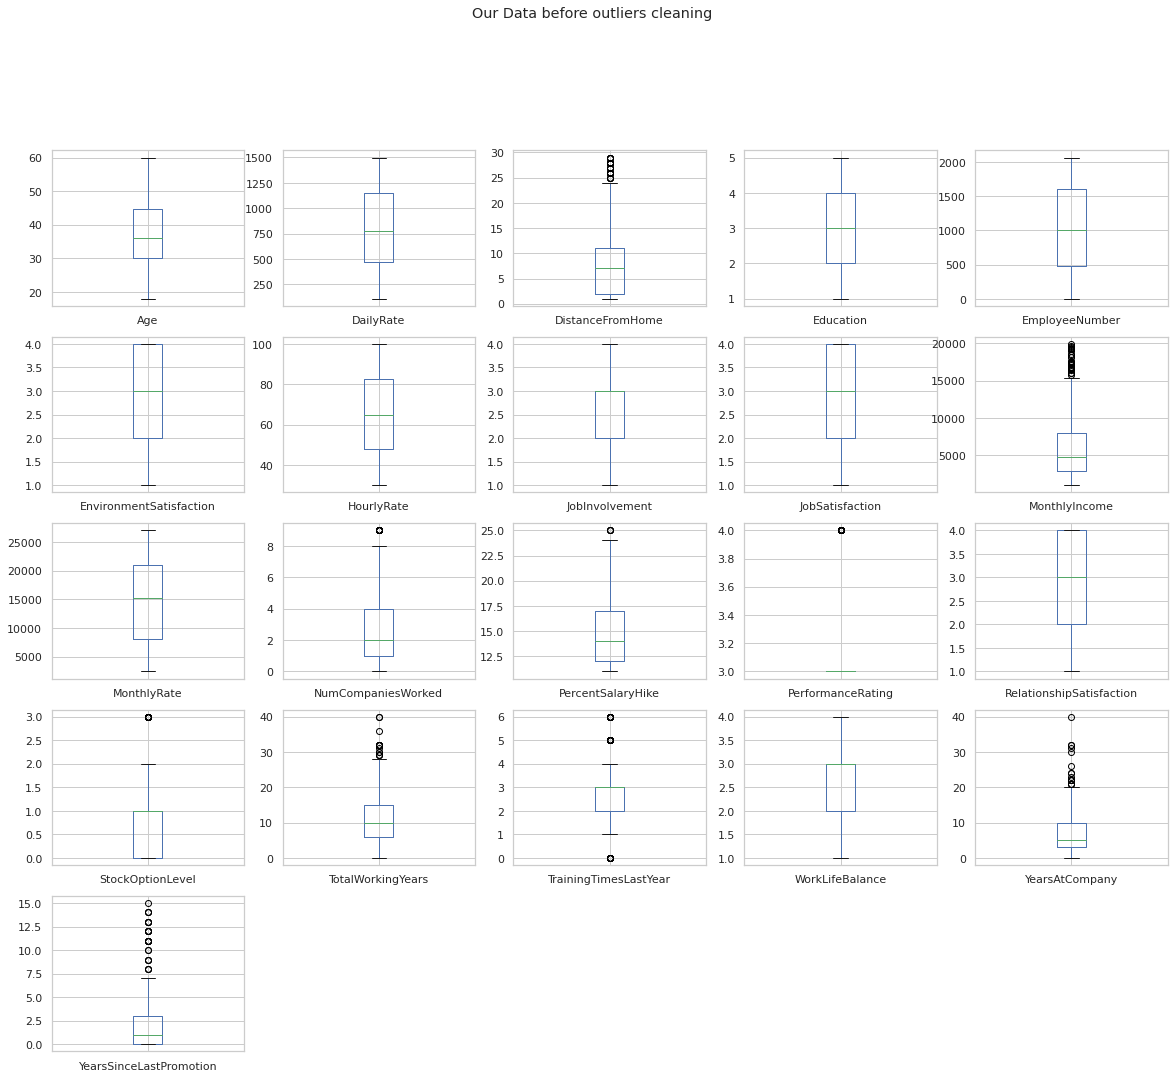

In [ ]:
test_df.select_dtypes(include="int64").plot(kind='box', subplots=True, title='Our Data before outliers cleaning', figsize=(20,20), layout=(6,5))
plt.show()

## Correcting by eliminating duplicates

Another important step before training our model is to check if there are duplicate observations. Indeed, if we have more than one occurancy of an observation it could lead our model to loss accuracy, and misleading our interpretation.

**Observations.**

* There are no duplicate observation
* No need to drop duplicates

In [ ]:
train_df.duplicated().sum()

0

In [ ]:
test_df.duplicated().sum()

0

In [ ]:
test_df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsSinceLastPromotion     0
dtype: int64

# VII. Model, predictions and solve

Now we are ready to train a model and predict the required solution.

Our problem is a classification and regression problem. We want to identify relationship between output (attrition yes or no) with other variables or features (Gender, Age, DistanceFromHome...) We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few.

**Machine learning Model**

For this brief, we choose to use the Logistic Regression model.
Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.


## Splitting the dataset into the training set and the testing set

In [ ]:
from sklearn.model_selection import train_test_split
# Target variable => Attrition. That's the variable we are trying to predict
y = train_df['Attrition']

# Explicative variable => All features that will help us predict an Attrition score for each employee (probability to leave or not the company)
X = train_df.drop(['Attrition'], axis=1)

# We decided to split 90% of the data into the training set and 10% into the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, train_size=0.9)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((990, 28), (990,), (110, 28), (110,))

## Encoding our features

Before we can train our model and make predictions, we have to do some data preprocessing on our features.

**What strategy to adopt ?**

* **For the numerical values**, we are going to use StandardScalar to center and scale independently each feature in the training set. Standardization of a dataset is a common requirement for many machine learning estimators as they might behave badly if the individual feature do not or less look like standard normally distribued data.
* **For the categorical values**, we are going to use OneHotEncoder to encode categorical features as one-hot numeroc array. This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_cols = X.select_dtypes(include="int64").columns
category_cols = X.select_dtypes(include="object").columns

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
standard_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('std', standard_transformer, numerical_cols),
        ('cat', categorical_transformer, category_cols)
    ]
)

## Logistic Regression model

**Metric** : The metric we will be using to evaluate our model is the **recall** score. Indeed, the important goal here is to minimize the number of false negatif and have the best proportion of employee correctly identified as True positive. 
We want to minimize the error to predict a potential employee as not leaving and he is actually leaving.

Note the confidence score generated by the model based on our training dataset

In [ ]:
# Function to get the score after fitting the model with our train sets
def get_score(X_train, y_train, X_test, y_test, pipeline):
    pipeline.fit(X_train, y_train)
    return ("model score: %.3f" % round(pipeline.score(X_train, y_train) * 100, 2))

# Return the matrix of confusion for the choosen model
def get_confusion_matrix(X_test, y_test, pipeline):
    matrix_df = pd.DataFrame(
        data = confusion_matrix(y_true = y_test, y_pred = pipeline.predict(X_test)),
        index = pipeline[1].classes_ + " actual",
        columns = pipeline[1].classes_ + " predicted").T
    return matrix_df

# Heatmap of the matrix of confusion
def show_matrix_heatmap(matrix):
    plt.title("Heatmap for the confusion matrix")
    sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.show()

# Function to plot the roc curve
def show_roc_curve(X_test, y_test, pipeline):
    #define metrics
    X_test = preprocessor.fit_transform(X_test)
    roc = roc_auc_score(y_test, pipeline.steps[1][1].predict_proba(X_test)[:,1])
    y_pred_proba = pipeline.steps[1][1].predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba, pos_label='Yes')
    idx = np.min(np.where(tpr > 0.95)) 
    
    #create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(round((roc),3)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='red')
    plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)

    plt.show()

model score: 89.900


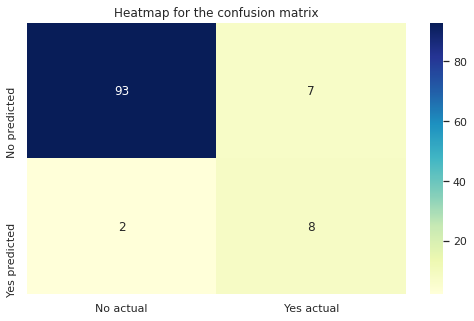

              precision    recall  f1-score   support

          No       0.93      0.98      0.95        95
         Yes       0.80      0.53      0.64        15

    accuracy                           0.92       110
   macro avg       0.86      0.76      0.80       110
weighted avg       0.91      0.92      0.91       110



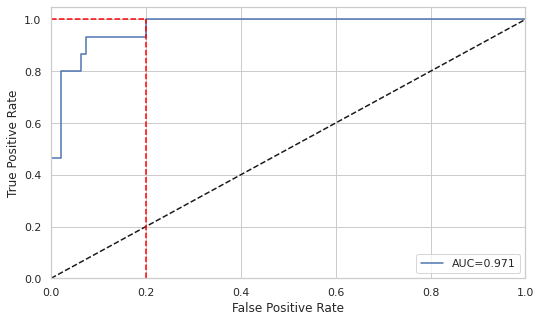

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(random_state=0)
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', lr)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(get_score(X_train, y_train, X_test, y_test, pipeline))
show_matrix_heatmap(get_confusion_matrix(X_test, y_test, pipeline))
print(classification_report(y_test, y_pred))
#show_roc_curves(X_test, y_test,X_train,y_train, pipeline)
show_roc_curve(X_test, y_test, pipeline)

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(pipeline[1].coef_[0])
coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
22,StockOptionLevel,0.88
20,PerformanceRating,0.52
11,JobInvolvement,0.40
27,YearsSinceLastPromotion,0.34
26,YearsAtCompany,0.30
2,DailyRate,0.30
6,EducationField,0.10
13,JobSatisfaction,0.08
10,HourlyRate,0.07
23,TotalWorkingYears,0.02


## Hyper-parameters tuning : GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params= {
    'model__C': [1,5,10,15,25,50,75,100,150],
    'model__penalty': ['l1', 'l2'],
    'model__max_iter': [50,100,150,200,250,300]
}

lr_gsvc = LogisticRegression(random_state=0)
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', lr_gsvc)
])

search = GridSearchCV(
    estimator=pipeline,
    param_grid=params,
    cv=5
)

model = search.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.best_params_)

              precision    recall  f1-score   support

          No       0.94      0.98      0.96        95
         Yes       0.82      0.60      0.69        15

    accuracy                           0.93       110
   macro avg       0.88      0.79      0.83       110
weighted avg       0.92      0.93      0.92       110

{'model__C': 5, 'model__max_iter': 100, 'model__penalty': 'l2'}


We can now test our model with the best parameters we have found.

model score: 79.390
              precision    recall  f1-score   support

          No       0.99      0.84      0.91        95
         Yes       0.48      0.93      0.64        15

    accuracy                           0.85       110
   macro avg       0.74      0.89      0.77       110
weighted avg       0.92      0.85      0.87       110



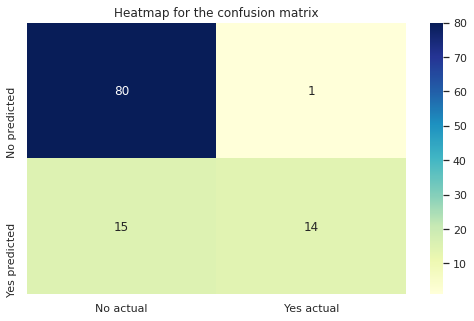

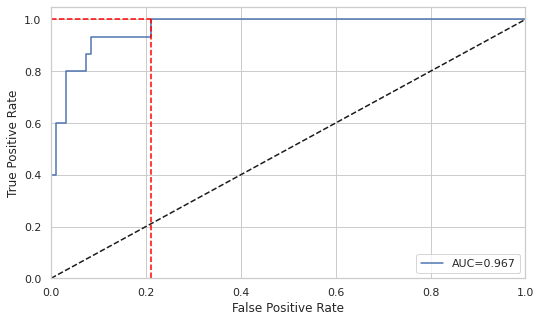

In [ ]:
lr_gsvc = LogisticRegression(C=5, penalty='l2', max_iter=100, class_weight='balanced', solver='liblinear')
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', lr_gsvc)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(get_score(X_train, y_train, X_test, y_test,pipeline))
print(classification_report(y_test, y_pred))
show_matrix_heatmap(get_confusion_matrix(X_test, y_test, pipeline))
show_roc_curve(X_test, y_test, pipeline)

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(pipeline[1].coef_[0])
coeff_df.sort_values(by="Correlation", ascending=False)

,Feature,Correlation
22,StockOptionLevel,0.80
27,YearsSinceLastPromotion,0.72
26,YearsAtCompany,0.51
20,PerformanceRating,0.41
11,JobInvolvement,0.33
25,WorkLifeBalance,0.23
2,DailyRate,0.19
13,JobSatisfaction,0.13
6,EducationField,0.11
23,TotalWorkingYears,0.11


## Hyper-parameters tuning : HyperOpt

In [ ]:
!pip install hyperopt

  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Not uninstalling decorator at /shared-libs/python3.7/py-core/lib/python3.7/site-packages, outside environment /root/venv
    Can't uninstall 'decorator'. No files were found to uninstall.


In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

In [ ]:
space = {
    'C': hp.choice('C', [1,5,10,15,25,50,75,100,150]),
    'penalty': hp.choice('penalty',['l1', 'l2', 'elasticnet']),
    'max_iter': hp.choice('max_iter',[50,100,150,200,250,300])
}

def hyperparameter_tuning(space):
    model = LogisticRegression(
        C=space['C'],
        penalty=space['penalty'],
        max_iter=space['max_iter']
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    accuracy = cross_val_score(pipeline, X_train, y_train, cv = 5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

trials = Trials()
best = fmin(
    fn=hyperparameter_tuning,
    space=space,
    algo= tpe.suggest,
    max_evals=50,
    trials=trials
)

best

100%|██████████| 50/50 [01:03<00:00,  1.28s/trial, best loss: -0.8828282828282829]


{'C': 1, 'max_iter': 1, 'penalty': 1}

model score: 79.390
              precision    recall  f1-score   support

          No       0.99      0.84      0.91        95
         Yes       0.48      0.93      0.64        15

    accuracy                           0.85       110
   macro avg       0.74      0.89      0.77       110
weighted avg       0.92      0.85      0.87       110



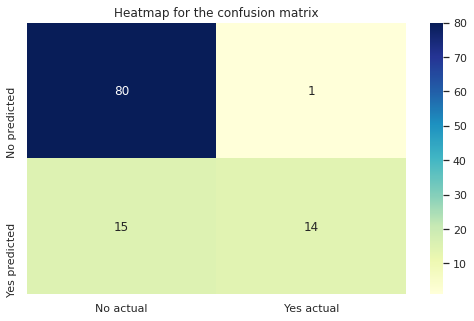

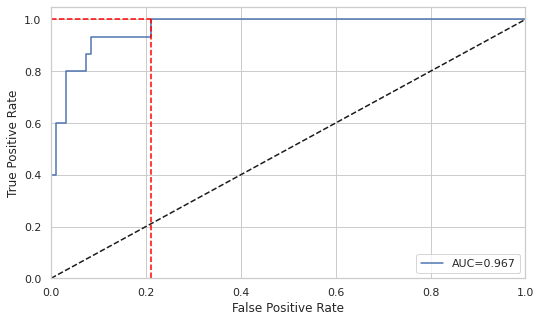

In [ ]:
lr_hp_opt = LogisticRegression(C=5, penalty='l2', max_iter=150, class_weight='balanced', solver='liblinear')
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', lr_hp_opt)
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(get_score(X_train, y_train, X_test, y_test,pipeline))
print(classification_report(y_test, y_pred))
show_matrix_heatmap(get_confusion_matrix(X_test, y_test, pipeline))
show_roc_curve(X_test, y_test, pipeline)

To see if it helps enhance our model predictions, we could use predict_proba with a threshold and analyse if the recall metric is better or not.

Avec predict_proba() : 
(Threshold = 0.6)

              precision    recall  f1-score   support

          No       0.99      0.89      0.94        95
         Yes       0.58      0.93      0.72        15

    accuracy                           0.90       110
   macro avg       0.79      0.91      0.83       110
weighted avg       0.93      0.90      0.91       110



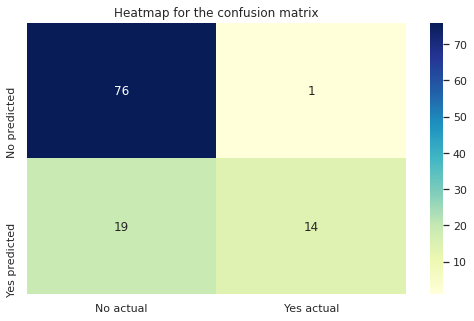

In [ ]:
threshold = 0.60
y_pred_proba = model.predict_proba(X_test)
y_pred_proba = model.classes_[np.argmax(y_pred_proba > threshold, axis=1)]
print(f'Avec predict_proba() : \n(Threshold = {threshold})\n')
print(classification_report(y_test, y_pred_proba))
show_matrix_heatmap(get_confusion_matrix(X_test, y_test, pipeline))

We notice that changing the threshold does not increase the recall score but it increased the number of false positif and decreased the number of true negatif.

# VIII. Predictions on the given test set

In [ ]:
X_valid = test_df

test_proba = pipeline.predict_proba(X_valid)
y_test_proba = pipeline.classes_[np.argmax(test_proba > threshold, axis=1)]

X_valid['y_pred'] = pd.Series(y_test_proba)

proba = pd.DataFrame(test_proba)
X_valid['Score'] = proba[1]

predictions = X_valid[['EmployeeNumber', 'Score', 'y_pred']]

predictions.head()


,EmployeeNumber,Score,y_pred
0,1,0.96,Yes
1,2,0.25,No
2,7,0.70,Yes
3,8,0.38,No
4,20,0.10,No


In [ ]:
# Converting the dataframe into a csv file
predictions.to_csv('test_predictions.csv')

In [ ]:
# Count the Yes and No predictions
predictions['y_pred'].value_counts()

No     289
Yes     81
Name: y_pred, dtype: int64

The optimal session size for the support program would be 81 persons

In [ ]:
#The employee that could benefit from this program
right_to_program_employee = predictions[predictions['y_pred'] == 'Yes']
right_to_program_employee

,EmployeeNumber,Score,y_pred
0,1,0.96,Yes
2,7,0.70,Yes
8,45,0.62,Yes
10,65,0.89,Yes
11,75,0.74,Yes
...,...,...,...
353,1968,0.97,Yes
355,1981,0.62,Yes
356,1997,0.76,Yes
363,2032,0.73,Yes


# IX Courbe Lift

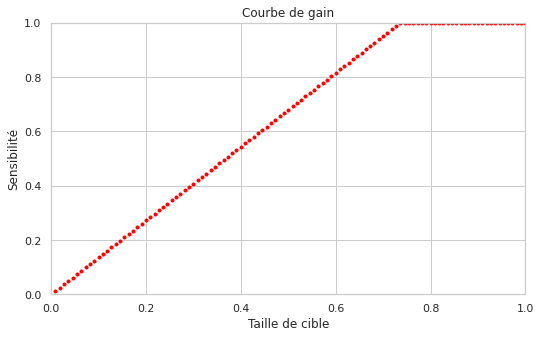

In [ ]:
score = test_proba[:,1]  

y_test_lift = predictions.y_pred
pos = pd.get_dummies(y_test_lift).values
pos = pos[:,1]
npos= np.sum(pos) 
index = np.argsort(score) 
index = index[::-1] 
sort_pos= pos[index]
cpos= np.cumsum(sort_pos) 
rappel = cpos/npos
n = y_test.shape[0]
taille = np.arange(start=1,stop=371,step=1)
taille = taille / n 
plt.title('Courbe de gain')
plt.xlabel('Taille de cible')
plt.ylabel('Sensibilité')

plt.xlim(0,1)
plt.ylim(0,1)
#plt.scatter(taille,taille,marker='.',color='blue')
plt.scatter(taille,rappel,marker='.',color='red')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1442ade7-abc1-429d-8ebd-2e3a1e62d121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>